In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

#OLS
import statsmodels.api as sm

sns.set_theme()

In [2]:
avocado = pd.read_csv('datasets/avocado.csv')
avocado.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [3]:
columns_to_keep = ['Date','AveragePrice','Total Volume','type','region']
avocado = avocado[columns_to_keep]

In [4]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   type          18249 non-null  object 
 4   region        18249 non-null  object 
dtypes: float64(2), object(3)
memory usage: 713.0+ KB


In [5]:
avocado.describe().T

count           mean           std    min       25%  \
AveragePrice  18249.0       1.405978  4.026766e-01   0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06  84.56  10838.58   

                    50%        75%          max  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52

In [6]:
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado.set_index('Date', inplace=True)

In [7]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18249 entries, 2015-12-27 to 2018-01-07
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   type          18249 non-null  object 
 3   region        18249 non-null  object 
dtypes: float64(2), object(2)
memory usage: 712.9+ KB


In [8]:
avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

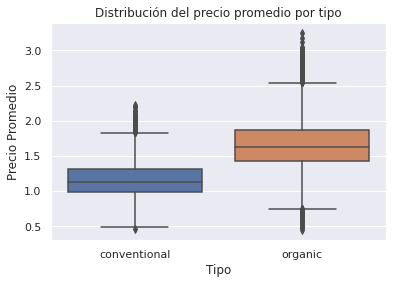

In [9]:
sns.boxplot(x=avocado['type'], y=avocado['AveragePrice'], orient='v')
plt.title("Distribución del precio promedio por tipo")
plt.xlabel("Tipo")
plt.ylabel("Precio Promedio")
plt.show()

In [10]:
conventional = avocado[avocado.type=='conventional'].copy()
organic = avocado[avocado.type=='organic'].copy()

In [11]:
avocado['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

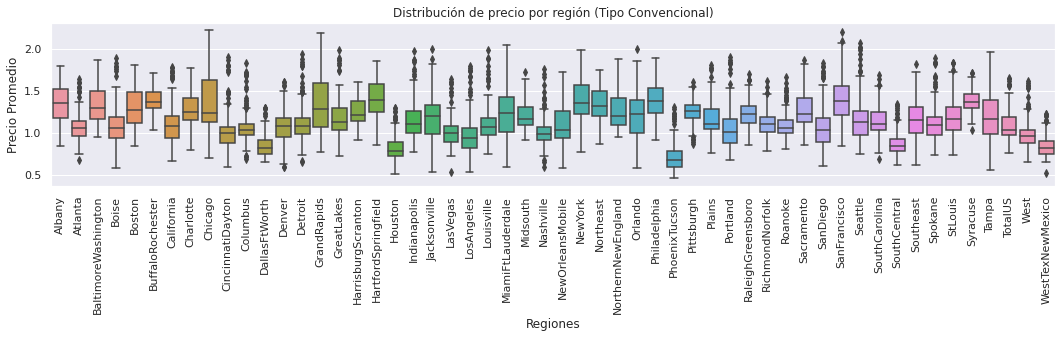

In [12]:
plt.figure(figsize=(18,3))
sns.boxplot(x=conventional['region'], y=conventional['AveragePrice'])
plt.title("Distribución de precio por región (Tipo Convencional)")
plt.xlabel("Regiones")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=90)
plt.show()

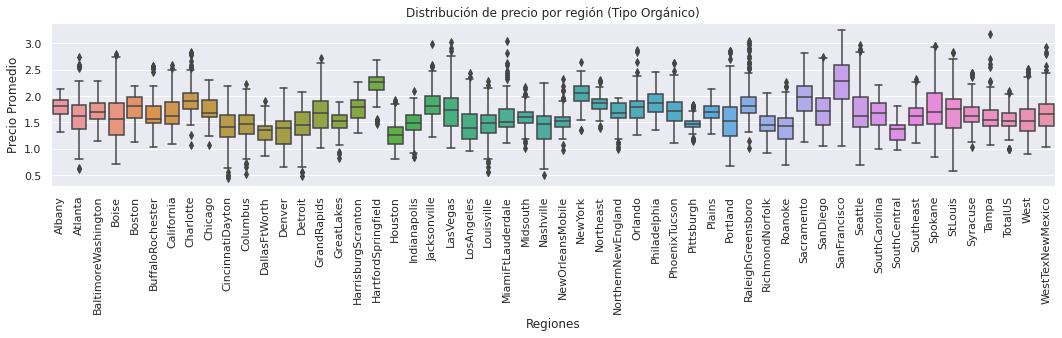

In [13]:
plt.figure(figsize=(18,3))
sns.boxplot(x=organic['region'], y=organic['AveragePrice'])
plt.title("Distribución de precio por región (Tipo Orgánico)")
plt.xlabel("Regiones")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=90)
plt.show()

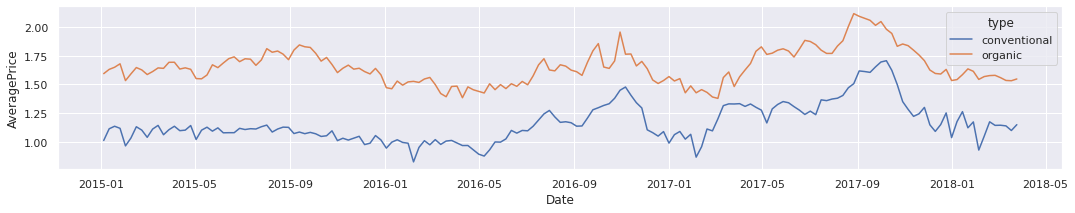

In [14]:
plt.figure(figsize=(18,3))
sns.lineplot(x=avocado.index, y=avocado['AveragePrice'], hue=avocado['type'], ci=None)
plt.show()

In [15]:
# Extraer el año y mes de la variable 'Date'
avocado['year'] = avocado.index.year
avocado['month'] = avocado.index.month 

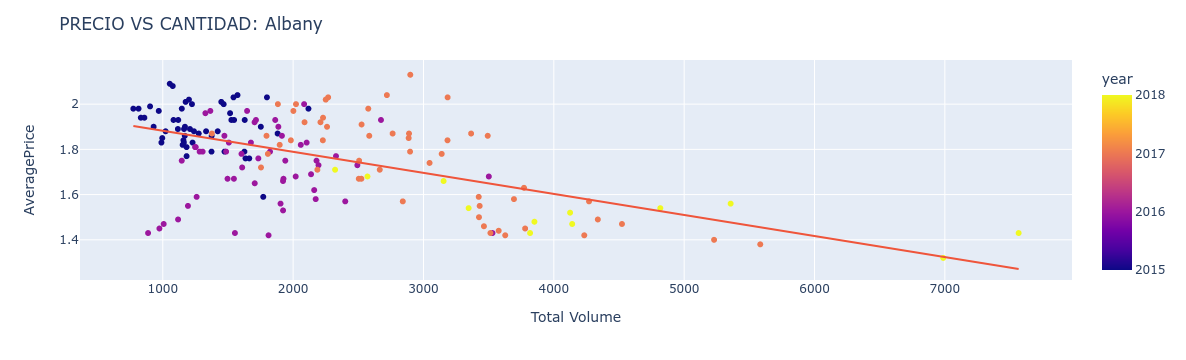

In [21]:
def regploter(df, type_, region):
    mask = df[(df['type']==type_) & (df['region']==region)]
    
    fig = px.scatter(x='Total Volume', y='AveragePrice', color='year', trendline='ols', data_frame=mask)
    fig.update_layout(title=f"PRECIO VS CANTIDAD: {region}")
    fig.show()
    
regploter(avocado, 'organic', 'Albany')

In [87]:
mask = avocado[['AveragePrice', 'Total Volume']]


def maximizer(df, var_opt, var_range, var_cost):
    
    #OLS
    Y = df['AveragePrice']
    X = df['Total Volume']
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    
    quantity = list(range(var_range[0], var_range[1], 1))
    cost = int(var_cost)
    price = []
    revenue = []
    for i in quantity:
        demand = model.params[0] + (model.params[0] * i)
        price.append(demand)
        revenue.append((i) * (demand - cost))
        
     # create data frame of price and revenue
    profit = pd.DataFrame(
        {"Price": price, "Quantity": quantity, "Revenue": revenue})
    
    return profit

var_opt = 'AveragePrice'
var_range = [100, 100000]
var_cost = 1
profit = maximizer(mask, var_opt, var_range, var_cost)

In [88]:
profit

Price  Quantity       Revenue
0         143.934721       100  1.429347e+04
1         145.359817       101  1.458034e+04
2         146.784914       102  1.487006e+04
3         148.210010       103  1.516263e+04
4         149.635106       104  1.545805e+04
...              ...       ...           ...
99895  142503.924476     99995  1.424958e+10
99896  142505.349572     99996  1.424986e+10
99897  142506.774668     99997  1.425015e+10
99898  142508.199764     99998  1.425043e+10
99899  142509.624861     99999  1.425072e+10

[99900 rows x 3 columns]

In [89]:
max_val = profit.loc[profit['Revenue'] == profit['Revenue'].max()]
max_val

Price  Quantity       Revenue
99899  142509.624861     99999  1.425072e+10

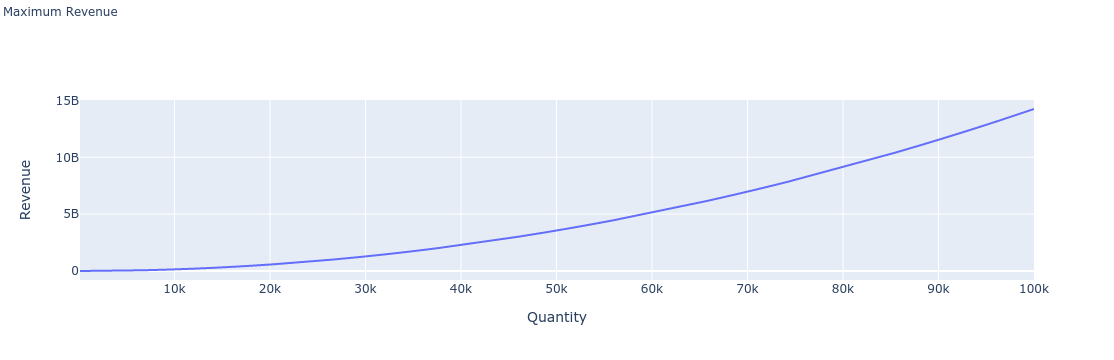

In [92]:
fig_QuantityVsRevenue = go.Figure()
fig_QuantityVsRevenue.add_trace(go.Scatter(
    x=profit['Quantity'], y=profit['Revenue']))
fig_QuantityVsRevenue.add_annotation(x=max_val['Quantity'], y=max_val['Revenue'],
                                         text="Maximum Revenue",
                                         showarrow=True,
                                         arrowhead=1)

fig_QuantityVsRevenue.update_layout(
    showlegend=False,
    xaxis_title="Quantity",
    yaxis_title="Revenue")

#fig_QuantityVsRevenue.add_vline(x=max_val['Quantity'], line_width=2, line_dash="dash",
 #                               line_color="red", opacity=0.25)
    
fig_QuantityVsRevenue.show()